In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

using CSV, DelimitedFiles, DataFrames

## Combinatorial Laplacian with random graphs

ER graph

least eigenvalue of Laplacian: 0.09999999999999992
k = 

407 vs nb edges= 24886
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

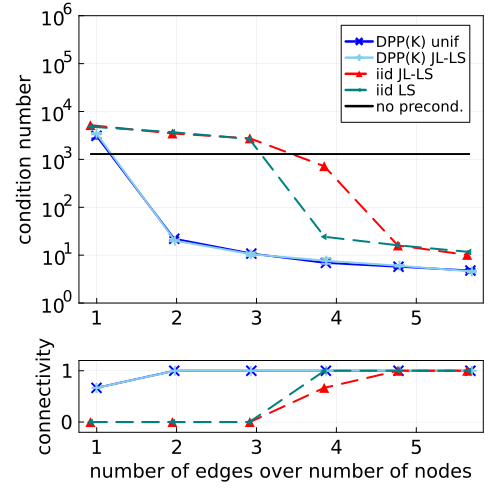

iid LS

[0.0, 0.0, 0.0, 0.6666666666666666, 1.0, 1.0]

In [21]:
rng = Random.default_rng()

# connection graph parameters
n = 500
p = 0.2
eta = 0.

# regularization parameter
q = 0.1 #0.001 good one

# simulation parameters
n_batch = 6 # maximum batch size considered
n_rep = 3 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end


methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    "iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# # saving plot
# savefig("figures/"*name*".pdf")


D_DPP = D_results["DPP(K) JL-LS"]
D_iid = D_results["iid JL-LS"]

t_DPP = D_DPP["timing"]
t_iid = D_iid["timing"]

print(D_iid["connected"])

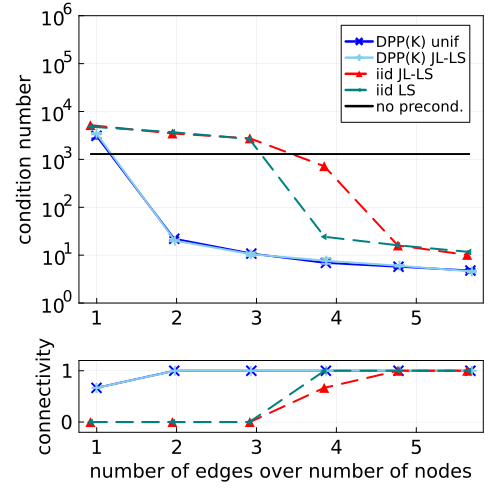

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondn500p0.2eta0.0q0.1.pdf"

In [22]:
# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# # saving plot
Plots.savefig("figures/"*name*".pdf")

In [108]:
using PlotlyJS
name = "nb_roots_ER"*string(q)

q = 0.001
nb_samples = 200
nb_roots = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    # cycles = get_prop(mtsf, :cycle_nodes)
    # nb_cycles[i_sample] = length(cycles)
    nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    

In [94]:
# n_max = Int(maximum(nb_roots))
# display(Plots.histogram(nb_roots, normalize=:probability, color=:gray, legend=false,                
# xtickfont=font(13),
# ytickfont=font(13),
# guidefont=font(13),
# legendfont=font(13),
# size=(500, 150)))
# #Plots.savefig("figures/"*name*".pdf")

In [109]:
name = "nb_roots_ER"*string(q)

#labels = string.(sort(unique(Int.(nb_roots))))
cat_nb_roots = string.(sort(Int.(nb_roots)))
trace = PlotlyJS.histogram(x=cat_nb_roots, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")

"figures/nb_roots_ER0.001.pdf"

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/mfanuel/.julia/packages/Makie/QGPt0/src/scenes.jl:220


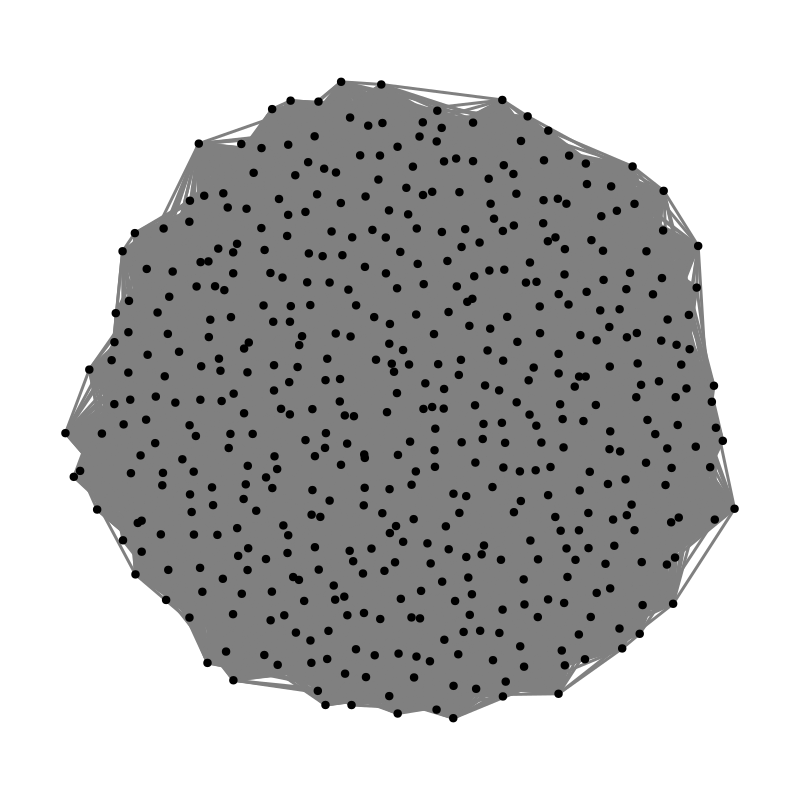

In [10]:
using CairoMakie
CairoMakie.activate!(type="png")
set_theme!(resolution=(400, 400))
# CairoMakie.inline!(true)

using GraphMakie: graphplot
using GraphMakie: graphplot!

using CairoMakie.Colors
using GeometryBasics: Point

edgecolors = [:gray for i in 1:ne(meta_g)]
nodesizes =  [6 for i in 1:nv(meta_g)]

f, ax, p = graphplot(meta_g;edge_color=edgecolors,node_size = nodesizes)

hidedecorations!(ax); hidespines!(ax)
ax.aspect = DataAspect()
f

 SBM graph

In [119]:
rng = Random.default_rng()

# graph parameters
c = [10 0.3 ;
0.3 10]

# c = [100 0.01 ;
# 0.01 100]
# n = [1000 ; 1000]
n = [1000, 1000]

# regularization parameter
q = 0.01 #0.1

# simulation parameters
n_batch = 6 # maximum batch size considered
n_rep = 3 # number of runs

# storing settings
#D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

print("is connected: ", is_connected(g))

# print least eigenvalues
# B = sp_magnetic_incidence(meta_g)
# l = power_method_least_eigenvalue(B' * B)
# println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    #"iid LS",
    # "ST JL-LS",
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond"*"SBM"*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)#(1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# # saving plot
# savefig("figures/"*name*".pdf")

D_DPP = D_results["DPP(K) JL-LS"]
D_iid = D_results["iid JL-LS"]

t_DPP = D_DPP["timing"]
t_iid = D_iid["timing"]

print(D_iid["connected"])

is connected: trueleast eigenvalue of Laplacian: 0.009999999999999962
k = 

378 vs nb edges= 10356
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LS

InterruptException: InterruptException:

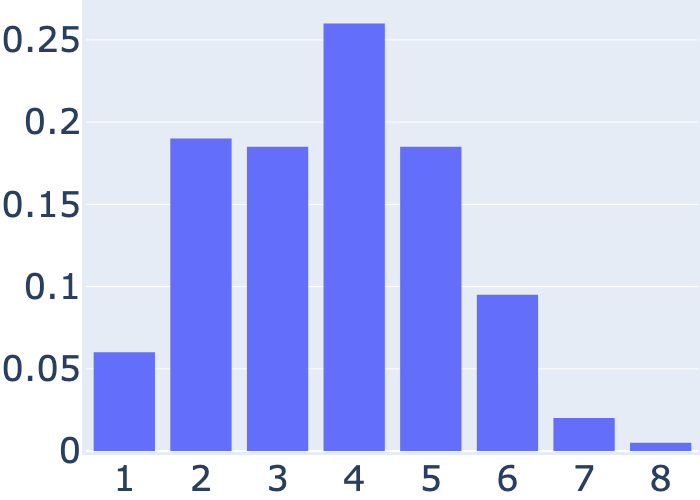

In [116]:
using PlotlyJS
name = "nb_roots_SBM"*string(q)

nb_samples = 200
nb_roots = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    # cycles = get_prop(mtsf, :cycle_nodes)
    # nb_cycles[i_sample] = length(cycles)
    nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    

#labels = string.(sort(unique(Int.(nb_roots))))
cat_nb_roots = string.(sort(Int.(nb_roots)))
trace = PlotlyJS.histogram(x=cat_nb_roots, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
#PlotlyJS.savefig(p,"figures/"*name*".pdf")

## Magnetic Laplacian with random graphs

MUN graph model

least eigenvalue of Laplacian: 0.048968299195457005
k = 

398 vs nb edges= 19948
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

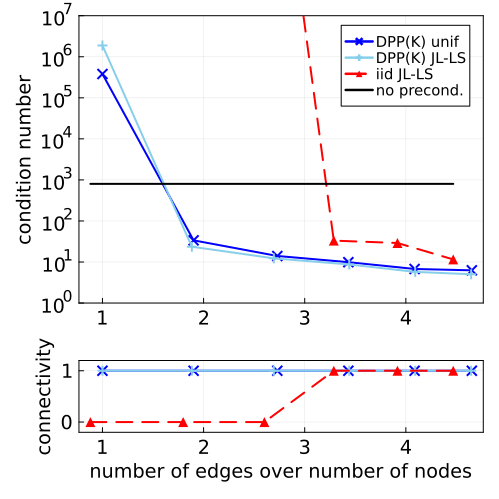

iid JL-LS

In [124]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 2000#100
p = 0.01#0.9
eta = 1e-1#1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
# B = sp_magnetic_incidence(meta_g)
# _, l = power_method_least_eigenvalue(B' * B)
# println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    #"iid LS",
    #"ST JL-LS"
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e7)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# # saving plot
# savefig("figures/"*name*".pdf")


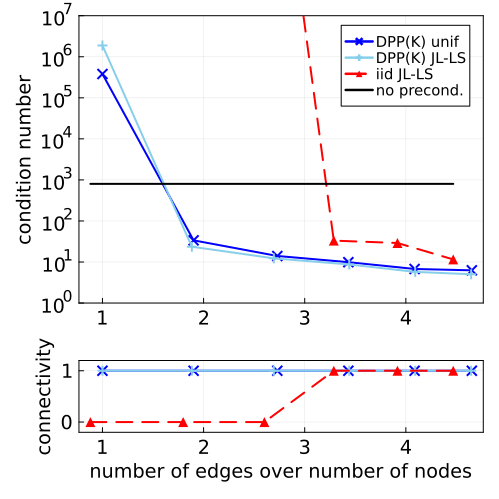

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondMUNn2000p0.01eta0.1q0.pdf"

In [126]:
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# # saving plot
Plots.savefig("figures/"*name*".pdf")

In [123]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    #nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    


name = "nb_cycles_"*type*string(eta)

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")


InterruptException: InterruptException:

ERO graph model

least eigenvalue: 1.3049689708785368
least eigenvalue of Laplacian: 1.3049689708786503


k = 423 vs nb edges= 37267
 
method: DPP(K) unif

method: DPP(K) JL-LS

method: iid JL-LS

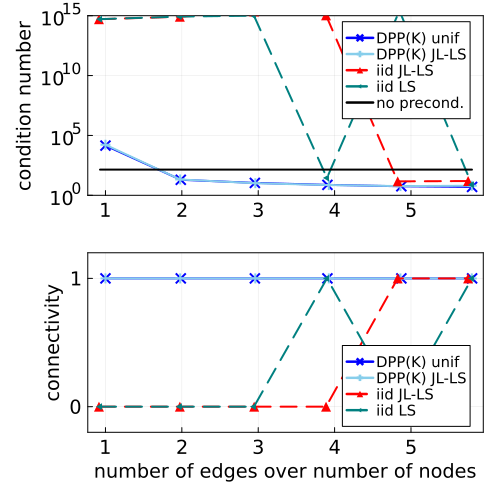

method: iid LS

In [53]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 500 # 100
p = 0.3 #0.9
eta = 1e-2 # 1e-3

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1#10 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# print least eigenvalues
B = sp_magnetic_incidence(meta_g)
_, l = power_method_least_eigenvalue(B' * B)
println("least eigenvalue: ", l)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    #"iid LS",
    #"ST JL-LS"
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e15)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# # saving plot
# savefig("figures/"*name*".pdf")


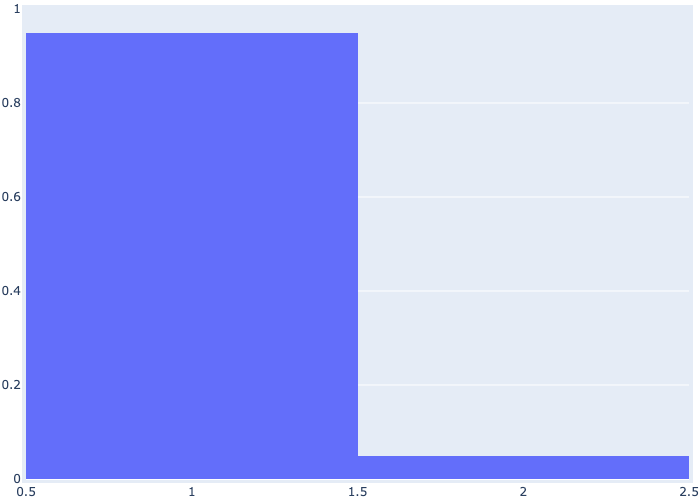

In [54]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    #nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    


name = "nb_cycles_"*type*string(eta)

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")


## Combinatorial Laplacian with a real graph


In [12]:
batch = 2
m = 10
ind_rd = rand(1:m, batch)

2-element Vector{Int64}:
 9
 3

In [18]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [19]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

SystemError: SystemError: opening file "polblogs.gml": No such file or directory

In [ ]:
# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# Laplacian 
B = magnetic_incidence(meta_g)
L = B' * B
l = eigvals(L)
# least eigenvalues to check the graph has one connected component
println(l[1:5]')

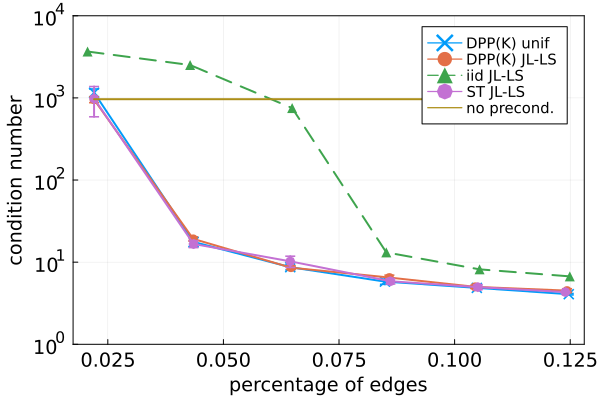

In [13]:
# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0.1

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    "ST JL-LS"
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# average number of roots
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

Sparse random graphs

connected graph generated with m/n = 20.06
least eigenvalue of Laplacian: 

0.0012458491156700261


method: DPP(K) unif

method: DPP(K) JL-LS

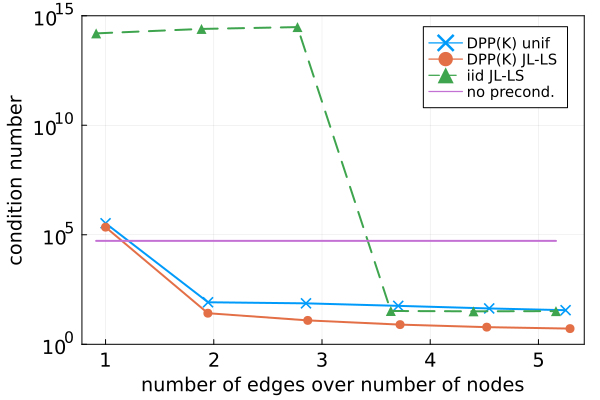

method: iid JL-LS

[0.0, 0.0, 0.0, 1.0, 1.0, 1.0]

In [8]:

rng = Random.default_rng()

# connection graph parameters

# number of edges / number of nodes
sparsity_meta_g = 20 

# number of nodes 
n = 3000
# probability that edge e is present
p = 2*sparsity_meta_g/n

# type of graph

# eta = 1e-2
# type = "MUN" # fine for 200 nodes

eta = 1e-5 #  0.2*1e-3
type = "ERO" 

# regularization parameter
q = 0

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model CHECKING if CONNECTED
meta_g = MetaGraph(n)
ic = false
while !ic
    if type=="MUN"
        meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
    elseif type=="ERO"
        meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
    end
    ic = is_connected(meta_g)
end
println("connected graph generated with m/n = ", ne(meta_g) / nv(meta_g))

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS"
    # "ST LS",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e15)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,methods)

# saving plot
savefig("figures/"*name*".pdf")

D_DPP = D_results["DPP(K) JL-LS"]
D_iid = D_results["iid JL-LS"]

t_DPP = D_DPP["timing"]
t_iid = D_iid["timing"]

print(D_iid["connected"])

In [4]:
[t_DPP t_iid]

6×2 Matrix{Float64}:
 0.476068  0.502803
 0.140759  0.102028
 0.251994  0.0544246
 0.149706  0.0596823
 0.186449  0.0919807
 0.236326  0.0867143

In [5]:
D_DPP

Dict{String, Any} with 20 entries:
  "cdL"             => 15024.4
  "sparsity_L"      => [4041.0, 176718.0, 355579.0, 492120.0, 612921.0, 696569.…
  "time_lev_ust"    => 0
  "roots"           => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  "cnd_std"         => [NaN, NaN, NaN, NaN, NaN, NaN]
  "connected"       => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  "time_lev_ust_JL" => 0
  "sparsity_L_std"  => [NaN, NaN, NaN, NaN, NaN, NaN]
  "timing_std"      => [NaN, NaN, NaN, NaN, NaN, NaN]
  "time_lev"        => 0
  "timing"          => [0.476068, 0.140759, 0.251994, 0.149706, 0.186449, 0.236…
  "roots_std"       => [NaN, NaN, NaN, NaN, NaN, NaN]
  "pc_edges"        => [0.0998502, 0.189216, 0.270494, 0.341737, 0.40654, 0.463…
  "cycles"          => [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
  "m"               => 20030
  "time_lev_JL"     => 28.6532
  "pc_edges_std"    => [NaN, NaN, NaN, NaN, NaN, NaN]
  "cycles_std"      => [NaN, NaN, NaN, NaN, NaN, NaN]
  "cnd"             => [1.65949e5, 25.2932, 12.0991, 8.26418, 6.80547,

In [27]:
C = cholesky(Hermitian(spL))
R = sparse(C.L)[invperm(C.p), :]


100×100 SparseMatrixCSC{ComplexF64, Int64} with 781 stored entries:
⠠⠀⠀⡀⡀⣀⠀⠀⣀⡀⠀⠀⠁⠒⠒⠀⠀⣀⡀⠀⠀⠀⠀⠀⠀⠄⢠⡄⠠⠤⣄⣀⣀⣀⣀⣀⣀⣀⣀⣀
⠀⠀⠀⠀⠀⠂⠀⠀⠀⡀⠉⠀⠀⠀⠀⠀⠀⠀⠀⠤⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠤⠤⠤⠀⠄⠤⠀⠒⠀⢀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠁⠉⠁⠀⠉⠀⡄⠀⠂⠀⠉⠁⠀⠀⠀⠀⠀⠀⠨⠀⠁⠀⠀⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀
⠂⡀⠀⠀⠀⠀⠀⠤⠄⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠒⠀⠐⠂⠤⠀⠀⠀⠒⠀⠀⠀⠀⠈⠭⠝⠋⠁⠈⠀⠀⠀⠀⢀⠀⠀⠀⠁⠉⠉⠉⠀⠀⠀⠀⠀⠀⠀⠀
⠠⡤⠀⠀⠀⠀⠂⠠⠀⠀⠤⠠⠈⠀⠉⠀⠉⠤⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠤⠤⠤⠄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⡀⠀⠁⠀⠀⠀⠀⠠⠤⠀⠀⠀⠀⠀⠀⠀⠀⠒⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⡂⠀⠀⠀⠤⠄⠀⡀⠀⠀⠀⡀⢀⠁⢀⣀⡀⠀⠀⠀⠀⢠⢤⠀⠀⠀⠀⠀⢀⣀⣀⠀⠀⠀⠀⠀⠀⠀
⡀⠀⠀⢀⡀⠀⠀⡈⣉⡉⠀⠀⠀⠠⠄⠑⠉⣉⡁⢀⠀⠀⠤⠄⢀⠀⠀⠀⠈⢉⣉⣉⣉⡀⠀⠀⠀⠀⠀⠀
⠀⣀⠠⠁⠄⠀⠐⠀⠀⠖⠀⠀⠀⠀⠀⠄⠤⠤⠄⠀⠀⠀⠀⠄⠀⠀⠠⠄⠀⠀⠤⠤⠤⠤⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠂⠀⠀⠀⠀⢂⠂⣀⠒⠀⠀⠀⠐⣒⡂⣁⠀⠀⠀⠂⠀⠀⠀⡠⠄⠐⣒⣒⣒⣒⣂⠀⠀⠀⠀⠀
⠒⠀⠀⠀⠐⠀⠐⠂⠐⠊⠀⠒⠀⠀⠒⠐⠒⠛⠓⠒⠈⠈⠀⠀⠚⢀⢉⡡⠀⠀⠙⠛⠛⠛⠛⠒⠀⠀⠀⠀
⠀⠀⠀⠀⠐⠀⠀⡀⠀⠁⠀⠈⠀⠀⠀⠀⠀⠉⠉⠀⠐⠒⠁⠁⠀⠀⠉⠁⠠⠀⠉⠉⠉⠉⠉⠉⠁⠀⠀⠀
⠀⠀⢀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠐⠂⠈⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢀⡀⠀⠀⠒⠀⡀⢐⡂⠀⠀⠀⠤⢀⠀⢀⣒⠂⠀⠀⠀⠐⠊⠐⠀⠐⠂⠀⠀⠒⠒⠒⠒⠒⠒⠒⠀⠀⠀
⠀⠀⠀⠀⠀⠀⡀⡀⢀⡀⠐⠐⠀⠀⠀⠀⠀⣒⡂⠒⢀⣐⠐⡂⠔⠀⠀⠀⠈⠙⢒⣒⣒⣒⣒⣒⣒⣂⠀⠀
⠀⠀⠒⠀⠀⠀⠀⠀⠀⠂⠀⠄⠀⠀⠀⠀⠀⠒⠂⠀⢀⠒⠀⠀⠈⠉⠀⠁⠀⠛⠛⠒⠒⠒⠒⠒⠒⠒⠂⠀
⠀⠩⠂⠊⠋⠐⠀⠔⠾⣏⢀⢀⠀⢀⣀⠔⢶⡿⠇⠀⠀⠀⠐⠂⠀⠀⠀⠀⠀⠀⠐⠶⠶⠶⠶⠶⠶⠶⠶⠀
⠀⠈⠀⠀⠐⠒⠐⠒⠒⠀⠀⠀⠬⠀⠀⠀⠈⠉⠁⡀⠉⠈⠀⠀⠀⠀⠀⠀⠒⠂⠉⠉⠉⠉⠉⠉⠉⠉⠉⠁

In [34]:
C = cholesky(Hermitian(spL))
R = sparse(C.L)[invperm(C.p), :]
T = Matrix(R) \ Matrix(Lap)
pcL = Matrix(R) \ (T')

100×100 Matrix{ComplexF64}:
     1.67323-0.0im          …  -0.00604593-0.000223189im
         0.0-0.0im              -0.0411202+0.0528954im
         0.0-0.0im             -0.00408185+0.0106368im
         0.0-0.0im             -0.00949679-0.024155im
         0.0+0.0im              -0.0378589-0.0422847im
         0.0+0.0im          …     0.023243+0.0140035im
 -0.00434127-0.0983294im        -0.0448081-0.108698im
         0.0-0.0im               0.0332344-0.0356964im
         0.0+0.0im               -0.323628-0.0510227im
         0.0-0.0im               -0.281258-0.151242im
            ⋮               ⋱  
   0.0387776-0.068157im          0.0145309+0.00167214im
  -0.0293885-0.0519767im          0.141051+0.0963541im
 0.000917857+0.0130971im         0.0149072+0.028136im
    -0.11181+0.0767845im           0.17746-0.278095im
  -0.0224484+0.008001im     …    -0.108152+0.135308im
   0.0258046+0.0363845im         0.0709201+0.00966908im
   -0.033339-0.0234511im        -0.0560338-0.0409793im
  -0.06